# Task 1

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test" #not using, mentioned just for reference

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
import torch
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

np.random.seed(2)

/Users/aryan/Desktop/Academics /Semester 4/Mathematical Foundations for AI/coding1_assignment_cs303/venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [5]:
# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# #
# #                                   ES335- Machine Learning- Assignment 1
# #
# # This script combines the data from the UCI HAR Dataset into a more usable format.
# # The data is combined into a single csv file for each subject and activity. 
# # The data is then stored in the Combined folder.
# #
# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# # Library imports
# import pandas as pd
# import numpy as np
# import os

# # Give the path of the test and train folder of UCI HAR Dataset
# train_path = "./UCI HAR Dataset/train"
# test_path = "./UCI HAR Dataset/test"

# # Dictionary of activities. Provided by the dataset.
# ACTIVITIES = {
#     1: 'WALKING'            ,
#     2: 'WALKING_UPSTAIRS'   ,
#     3: 'WALKING_DOWNSTAIRS' ,
#     4: 'SITTING'            ,
#     5: 'STANDING'           ,
#     6: 'LAYING'             ,
# }

# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#                                         # Combining Traing Data
# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# # Load all the accelerometer data
# total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
# total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
# total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# # Read the subject IDs
# subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# # Read the labels
# y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# # Toggle through all the subjects.
# for subject in np.unique(subject_train.values):

#     sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
#     labels = y.loc[sub_idxs]

#     # Toggle through all the labels.
#     for label in np.unique(labels.values):

#         # make the folder directory if it does not exist
#         if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
#             os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

#         label_idxs = labels[labels.iloc[:,0] == label].index

#         accx = []
#         accy = []
#         accz = []

#         for idx in label_idxs:
#             if accx is not None:
#                 accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
#                 accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
#                 accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

#             else:
#                 accx = total_acc_x.loc[idx]
#                 accy = total_acc_y.loc[idx]
#                 accz = total_acc_z.loc[idx]

#         # saving the data into csv file
#         data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
#         save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
#         data.to_csv(save_path,index=False)

# print("Done Combining the training data")


# # =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# #                                         Combining Test Data               
# # =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# # Load all the accelerometer data
# total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
# total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
# total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# # Read the subject IDs
# subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# # Read the labels
# y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# # Toggle through all the subjects.
# for subject in np.unique(subject_test.values):
    
#         sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
#         labels = y.loc[sub_idxs]

#         # Toggle through all the labels.
#         for label in np.unique(labels.values):
    
#             if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
#                 os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
#             label_idxs = labels[labels.iloc[:,0] == label].index
    
#             accx = []
#             accy = []
#             accz = []
#             for idx in label_idxs:
#                 if accx is not None:
#                     accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
#                     accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
#                     accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
#                 else:
#                     accx = total_acc_x.loc[idx]
#                     accy = total_acc_y.loc[idx]
#                     accz = total_acc_z.loc[idx]
    
#             # saving the data into csv file
#             data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
#             save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
#             data.to_csv(save_path,index=False)

# print("Done Combining the testing data")
# print("Done Combining the data")

# #-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [6]:
# total_acc_x.shape, total_acc_y.shape, total_acc_z.shape

## Data Processing

#### Number of Subjects

In [7]:
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),sep='\s+',header=None)
len(np.unique(subject_train))

21

#### Inertial Signals (Processed/windowed already)

In [8]:
#Load all the accelerometer body acceleration data
body_acc_x_windowed = pd.read_csv(os.path.join(train_path,"Inertial Signals","body_acc_x_train.txt"),sep='\s+',header=None)
body_acc_y_windowed = pd.read_csv(os.path.join(train_path,"Inertial Signals","body_acc_y_train.txt"),sep='\s+',header=None)
body_acc_z_windowed = pd.read_csv(os.path.join(train_path,"Inertial Signals","body_acc_z_train.txt"),sep='\s+',header=None)

In [9]:
body_acc_x_windowed_np = body_acc_x_windowed.to_numpy()
body_acc_y_windowed_np = body_acc_y_windowed.to_numpy()
body_acc_z_windowed_np = body_acc_z_windowed.to_numpy()

In [10]:
body_acc_x_windowed_np = body_acc_x_windowed_np.astype(np.float32) 
body_acc_y_windowed_np = body_acc_y_windowed_np.astype(np.float32) 
body_acc_z_windowed_np = body_acc_z_windowed_np.astype(np.float32) 

In [11]:
body_acc_x_windowed_np.shape, body_acc_y_windowed_np.shape, body_acc_z_windowed_np.shape

((7352, 128), (7352, 128), (7352, 128))

### Key note and Understanding the dataset : 

We are going to be using the inertial signals **"body_acc_x_train.txt", "body_acc_y_train.txt" and "body_acc_z_train.txt".** (Only of the train set)

The UCI HAR dataset provides pre-processed time-series data with windowing already applied. 
(50% Overlap)

**Explaination:** 
- Assume Row1, Row2, Row3 and so on are my time series vectors. 
- The last 64 elements of Row1 are windowed and defined as the first 64 elements of Row2. 
- Similiarly, the last 64 of Row2 show us as the first 64 of Row3 and so on. 

**More elaborately,** 

- The number of unique subjects is 21. Each subject performs some combination of the 6 activities. 
    Example: Subject 1 may perform walking and sitting. And so on. 
- The shape of one direction is (7352, 128) 
    - This indicates, that I have 7352 Time Series Vectors. 
    - And, each consequetive vector has a 50% overlap or 64/128 start samples of k vector belong to the end samples of the k-1th vector. 



## Visualizations

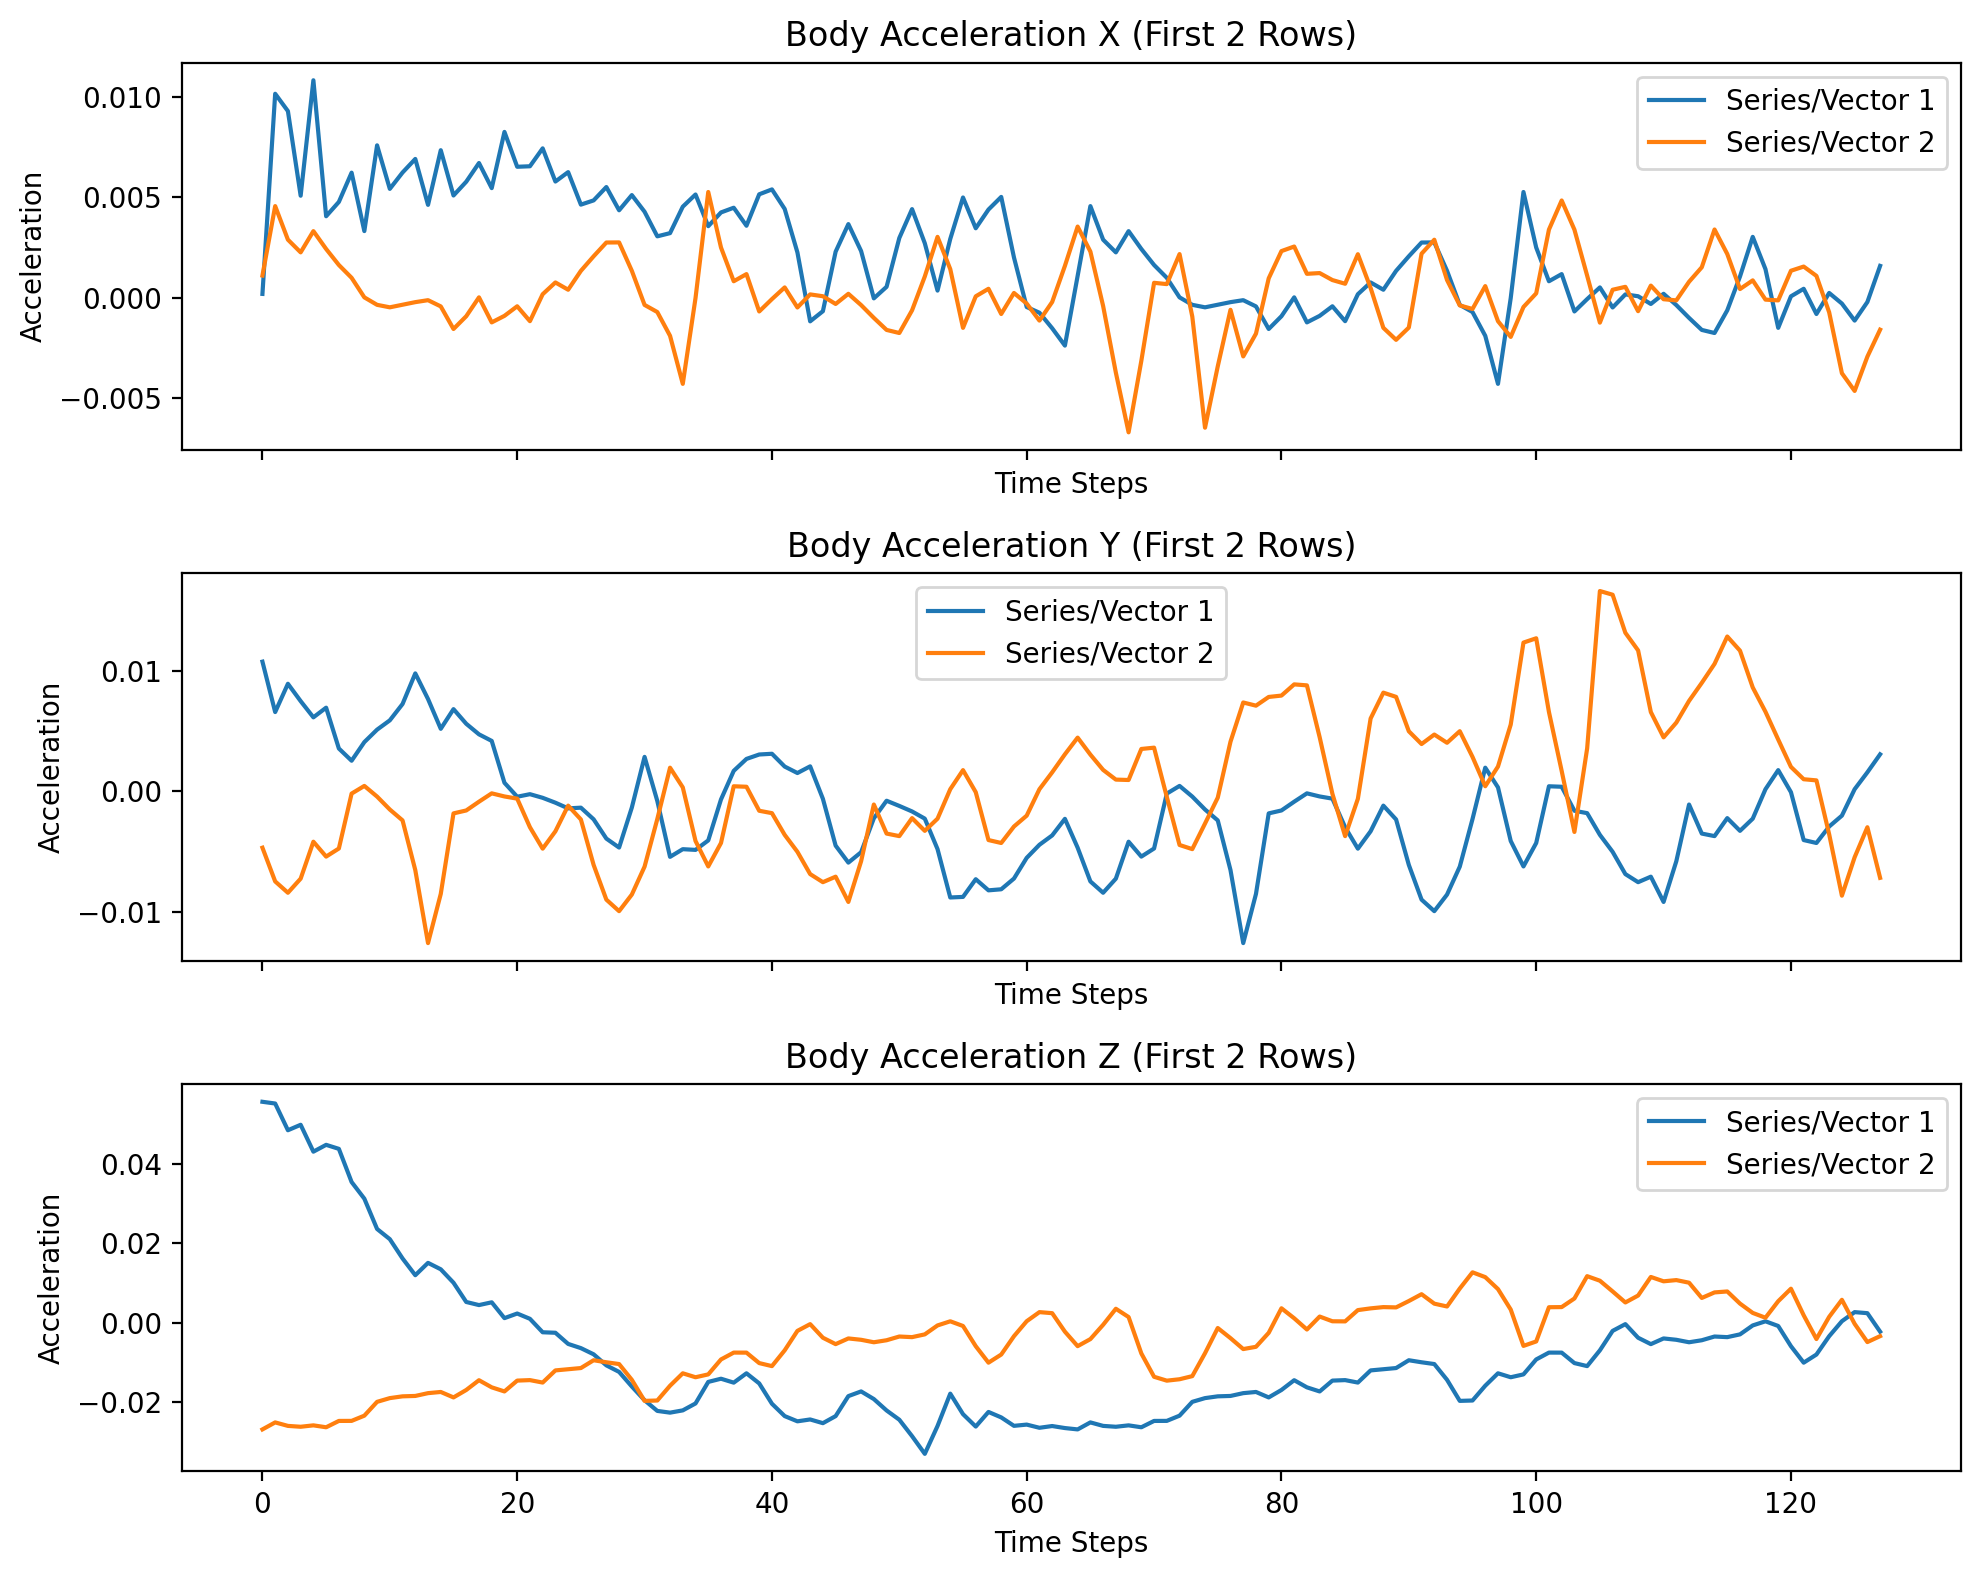

' Here observe how second half of blue matches to first half of orange - since windowed. '

In [12]:
def plot_time_series(data, title, ax):
    for i in range(data.shape[0]):
        ax.plot(data[i], label=f"Series/Vector {i+1}")
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Time Steps")
    ax.set_ylabel("Acceleration")
    ax.legend()

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

k = 2 #number of rows 

plot_time_series(body_acc_x_windowed_np[:k], f"Body Acceleration X (First {k} Rows)", axes[0])
plot_time_series(body_acc_y_windowed_np[:k], f"Body Acceleration Y (First {k} Rows)", axes[1])
plot_time_series(body_acc_z_windowed_np[:k], f"Body Acceleration Z (First {k} Rows)", axes[2])

plt.tight_layout()
plt.show()

''' Here observe how second half of blue matches to first half of orange - since windowed. '''


In [13]:
n = 100 #number of time series vectors
#reduced for faster computation
#### SHAPE OF THE DATA - Written this way for identification######

'''Let us take 28 to 128=> 4, 6,1 and a little 3'''

'Let us take 28 to 128=> 4, 6,1 and a little 3'

In [14]:
body_acc_x_windowed_np= body_acc_x_windowed_np[28:128]
body_acc_y_windowed_np= body_acc_y_windowed_np[28:128]
body_acc_z_windowed_np= body_acc_z_windowed_np[28:128]

In [15]:
file_path = "UCI HAR Dataset/train/y_train.txt"

y_train = np.loadtxt(file_path, dtype=int)

print(y_train.shape)

(7352,)


In [16]:
y_train_need = y_train[28:128]
 
'''
1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING
'''
y_train_need

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3])

## DTW and Euclidian Distance

The Euclidean distance between two time-series vectors  X  and  Y , each of length  n , is given by the formula:


$$d(X, Y) = \sqrt{\sum_{i=1}^{n} (X_i - Y_i)^2}$$

The main idea is to compute the distance from the matching of similar elements between time series. 

Example, imagine two people saying the same sentence, one speaking quickly and one speaking more slowly. If I were to graph the sound waves of each sentence, the shapes would look similar in terms of rises and falls, but they would not line up perfectly all the time axis due to the difference in speak. If I tried to compare these sound waves using a straightforward, point-to-point approach (like Euclidean distance), the comparison would be unfair. 

It’s like trying to synchronize two singers when one is slightly ahead or behind the other; they’re singing the same notes, but not at the same time, so a direct comparison at any given moment wouldn’t make much sense. Hence, DTW is better. 

### Euclidian Distance - Pairwise For x, y and z direction respectively
Euclidean distance assumes both vectors are in the same space/same feature. 

In [17]:
euc_distance_matrix_x = np.zeros((n, n))
euc_distance_matrix_y= np.copy(euc_distance_matrix_x)
euc_distance_matrix_z= np.copy(euc_distance_matrix_x)

#for each axis, the matrix looks the same. 

In [18]:
euc_distance_matrix_x.shape

(100, 100)

In [19]:
def compute_euclidean(i, j):
    return (
        euclidean(body_acc_x_windowed_np[i], body_acc_x_windowed_np[j]),
        euclidean(body_acc_y_windowed_np[i], body_acc_y_windowed_np[j]),
        euclidean(body_acc_z_windowed_np[i], body_acc_z_windowed_np[j])
    )

In [20]:
index_pairs = [(i, j) for i in range(n) for j in range(n)]

In [21]:
with tqdm_joblib(tqdm(desc="Computing Euclidian Distances", total=len(index_pairs))):
    results = Parallel(n_jobs=-1)(delayed(compute_euclidean)(i, j) for i, j in index_pairs)

for idx, (i, j) in enumerate(index_pairs):
    euc_distance_matrix_x[i, j], euc_distance_matrix_y[i, j], euc_distance_matrix_z[i, j] = results[idx]

100%|██████████| 10000/10000 [00:01<00:00, 8244.12it/s] [00:00<?, ?it/s]


In [22]:
# for i in tqdm(range(n), desc="Computing distances"):
#     for j in range(n):
#         euc_distance_matrix_x[i, j] = euclidean(body_acc_x_windowed_np[i], body_acc_x_windowed_np[j])
#         euc_distance_matrix_y[i, j] = euclidean(body_acc_y_windowed_np[i], body_acc_y_windowed_np[j])
#         euc_distance_matrix_z[i, j] = euclidean(body_acc_z_windowed_np[i], body_acc_z_windowed_np[j])

In [23]:
df_x = pd.DataFrame(euc_distance_matrix_x, 
                    columns=[f"Vec {i+1}" for i in range(n)], 
                    index=[f"Vec {i+1}" for i in range(n)])

df_y = pd.DataFrame(euc_distance_matrix_y, 
                    columns=[f"Vec {i+1}" for i in range(n)], 
                    index=[f"Vec {i+1}" for i in range(n)])

df_z = pd.DataFrame(euc_distance_matrix_z, 
                    columns=[f"Vec {i+1}" for i in range(n)], 
                    index=[f"Vec {i+1}" for i in range(n)])

In [24]:
df_x

,Vec 1,Vec 2,Vec 3,Vec 4,Vec 5,Vec 6,Vec 7,Vec 8,Vec 9,Vec 10,...,Vec 91,Vec 92,Vec 93,Vec 94,Vec 95,Vec 96,Vec 97,Vec 98,Vec 99,Vec 100
Vec 1,0.000000,0.109258,0.703406,1.194292,0.962687,0.117356,0.157425,0.098907,0.068570,0.099143,...,2.238881,2.324375,2.321611,2.083541,2.338917,2.511938,2.313399,3.053014,3.533259,3.335517
Vec 2,0.109258,0.000000,0.700299,1.156604,0.965668,0.212389,0.075431,0.070875,0.056908,0.044509,...,2.244158,2.327642,2.326475,2.061535,2.340827,2.508833,2.311903,3.057053,3.538863,3.334983
Vec 3,0.703406,0.700299,0.000000,1.342212,1.197798,0.718582,0.719145,0.710377,0.700324,0.718581,...,2.363625,2.385115,2.441137,2.192905,2.585134,2.487623,2.240069,3.282393,3.780899,3.509356
Vec 4,1.194292,1.156604,1.342212,0.000000,1.490281,1.266073,1.140146,1.178268,1.170572,1.161157,...,2.542775,2.574622,2.603943,2.421175,2.652653,2.814014,2.470356,3.469121,3.831052,3.710541
Vec 5,0.962687,0.965668,1.197798,1.490281,0.000000,0.978904,1.021404,0.910664,0.954714,0.942146,...,2.475648,2.475561,2.484560,2.326771,2.549848,2.699035,2.424015,3.220037,3.648581,3.436909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vec 96,2.511938,2.508833,2.487623,2.814014,2.699035,2.517815,2.507573,2.511208,2.501204,2.514970,...,3.219237,3.578562,3.475374,3.798244,3.592517,0.000000,3.523230,3.573788,3.530203,3.625854
Vec 97,2.313399,2.311903,2.240069,2.470356,2.424015,2.291197,2.320744,2.308887,2.310062,2.312210,...,3.164757,2.861306,3.407489,3.059317,3.839908,3.523230,0.000000,4.093122,4.452935,4.069108
Vec 98,3.053014,3.057053,3.282393,3.469121,3.220037,3.046623,3.056608,3.051747,3.052403,3.052271,...,3.261938,3.796076,4.295753,3.891591,3.399011,3.573788,4.093122,0.000000,2.298649,2.555894
Vec 99,3.533259,3.538863,3.780899,3.831052,3.648581,3.529188,3.536214,3.527635,3.531787,3.530477,...,3.538103,4.005848,4.825832,4.732581,3.571253,3.530203,4.452935,2.298649,0.000000,2.541900


In [25]:
df_y

,Vec 1,Vec 2,Vec 3,Vec 4,Vec 5,Vec 6,Vec 7,Vec 8,Vec 9,Vec 10,...,Vec 91,Vec 92,Vec 93,Vec 94,Vec 95,Vec 96,Vec 97,Vec 98,Vec 99,Vec 100
Vec 1,0.000000,0.340019,0.662219,1.555731,1.453235,0.301548,0.278894,0.280887,0.252010,0.267900,...,1.927393,1.801467,1.796571,1.954983,2.063516,1.996320,1.997433,1.649238,1.670210,1.962597
Vec 2,0.340019,0.000000,0.578543,1.362886,1.389218,0.468515,0.074426,0.146490,0.142419,0.132067,...,1.914282,1.825619,1.805211,1.963009,1.998980,2.019970,1.997338,1.608623,1.689485,1.932598
Vec 3,0.662219,0.578543,0.000000,1.171664,1.383631,0.685857,0.580189,0.589777,0.582986,0.579277,...,1.980318,1.922145,1.888832,2.067745,2.006829,2.033551,2.105154,1.652426,1.744200,2.087973
Vec 4,1.555731,1.362886,1.171664,0.000000,1.518516,1.509632,1.398625,1.392670,1.403494,1.393409,...,2.487311,2.227705,2.219733,2.474476,2.480965,2.400980,2.349762,2.041961,2.154753,2.388254
Vec 5,1.453235,1.389218,1.383631,1.518516,0.000000,1.185296,1.396953,1.292930,1.317124,1.313846,...,2.337644,2.249802,2.169522,2.308969,2.438837,2.390727,2.423241,1.908562,2.124110,2.297843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vec 96,1.996320,2.019970,2.033551,2.400980,2.390727,1.979452,2.011477,1.996119,2.006407,2.001523,...,2.411663,2.095761,2.891351,3.139290,2.839250,0.000000,2.859767,2.086766,2.299003,2.378062
Vec 97,1.997433,1.997338,2.105154,2.349762,2.423241,2.014647,1.989922,1.990827,1.986084,1.994714,...,3.173060,2.236481,1.928562,3.195006,3.185019,2.859767,0.000000,2.258770,2.273328,2.411534
Vec 98,1.649238,1.608623,1.652426,2.041961,1.908562,1.610542,1.607738,1.588001,1.599754,1.602628,...,2.448259,2.104702,2.102521,2.901503,2.633560,2.086766,2.258770,0.000000,1.751046,1.536298
Vec 99,1.670210,1.689485,1.744200,2.154753,2.124110,1.679351,1.678017,1.673902,1.669697,1.677665,...,2.364770,1.998361,2.409136,2.751007,2.679682,2.299003,2.273328,1.751046,0.000000,2.027503


In [26]:
df_z

,Vec 1,Vec 2,Vec 3,Vec 4,Vec 5,Vec 6,Vec 7,Vec 8,Vec 9,Vec 10,...,Vec 91,Vec 92,Vec 93,Vec 94,Vec 95,Vec 96,Vec 97,Vec 98,Vec 99,Vec 100
Vec 1,0.000000,0.220718,0.926693,1.269983,1.096436,0.116616,0.189207,0.231790,0.192621,0.222525,...,1.524381,1.451469,1.557174,1.679969,1.715259,1.711985,1.599656,1.300922,1.453763,1.398300
Vec 2,0.220718,0.000000,0.912142,1.254331,0.945243,0.252042,0.088571,0.101436,0.080962,0.072782,...,1.511837,1.439481,1.516574,1.647513,1.680300,1.706076,1.601470,1.259195,1.392390,1.369264
Vec 3,0.926693,0.912142,0.000000,1.717824,1.256707,0.902329,0.924458,0.906818,0.898036,0.919599,...,2.002128,1.924862,1.947778,1.975893,2.018764,1.802481,1.449258,1.875191,1.932623,1.793559
Vec 4,1.269983,1.254331,1.717824,0.000000,1.782666,1.335034,1.237851,1.292585,1.276701,1.265740,...,1.996540,2.073010,2.070977,2.312643,2.229743,2.202637,1.833114,1.944704,2.092194,2.162079
Vec 5,1.096436,0.945243,1.256707,1.782666,0.000000,1.045853,1.005748,0.892098,0.934855,0.917723,...,1.912541,1.789370,1.713361,1.764490,1.980661,1.936114,1.809336,1.421775,1.570376,1.528195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vec 96,1.711985,1.706076,1.802481,2.202637,1.936114,1.689247,1.711629,1.688264,1.695181,1.700763,...,2.542280,2.660182,2.581810,2.453004,1.930313,0.000000,1.954104,2.103382,2.161260,2.084692
Vec 97,1.599656,1.601470,1.449258,1.833114,1.809336,1.588788,1.608537,1.578441,1.582019,1.588040,...,2.512868,2.420746,2.529204,2.694213,2.588803,1.954104,0.000000,2.355230,2.366244,2.399623
Vec 98,1.300922,1.259195,1.875191,1.944704,1.421775,1.288257,1.279974,1.253632,1.259424,1.256965,...,2.075463,1.657344,1.446265,1.471885,1.783985,2.103382,2.355230,0.000000,1.268230,1.266331
Vec 99,1.453763,1.392390,1.932623,2.092194,1.570376,1.452671,1.416040,1.404790,1.403544,1.400739,...,2.220891,1.775583,1.455000,1.599224,1.737998,2.161260,2.366244,1.268230,0.000000,1.461872


### DTW (Dynamic Time Wrapping) - Pairwise For x, y and z direction respectively


Dynamic Time Warping (DTW) is computed using the following recurrence relation:

$$
D(i, j) = d(x_i, y_j) + \min
\begin{cases}
D(i-1, j) & \text{(insertion)} \\
D(i, j-1) & \text{(deletion)} \\
D(i-1, j-1) & \text{(match)}
\end{cases}
$$

where $d(x_i, y_j)$ is the Euclidean distance between points.

The total warping cost is:

$$
DTW(X, Y) = D(N, M)
$$

where $X = (x_1, x_2, ..., x_N)$ and $Y = (y_1, y_2, ..., y_M)$.


In [27]:
from fastdtw import fastdtw

In [28]:
dtw_distance_matrix_x = np.zeros((n, n))
dtw_distance_matrix_y = np.zeros((n, n))
dtw_distance_matrix_z = np.zeros((n, n))

In [29]:
def dtw_all(i, j):
    return (
        fastdtw(body_acc_x_windowed_np[i], body_acc_x_windowed_np[j], radius=10)[0],
        fastdtw(body_acc_y_windowed_np[i], body_acc_y_windowed_np[j], radius=10)[0],
        fastdtw(body_acc_z_windowed_np[i], body_acc_z_windowed_np[j], radius=10)[0]
    )
#10 indicates the wrapping window.

In [30]:
index_pairs = [(i, j) for i in range(n) for j in range(n)]

In [31]:
with tqdm_joblib(tqdm(desc="Computing DTW", total=len(index_pairs))):
    results = Parallel(n_jobs=10)(delayed(dtw_all)(i, j) for i, j in index_pairs)

for idx, (i, j) in enumerate(index_pairs):
    dtw_distance_matrix_x[i, j], dtw_distance_matrix_y[i, j], dtw_distance_matrix_z[i, j]  = results[idx]























































































































































































































































































































































































































































































































































































100%|██████████| 10000/10000 [01:11<00:00, 139.18it/s]


In [32]:
df_x = pd.DataFrame(dtw_distance_matrix_x, 
                    columns=[f"Vec {i+1}" for i in range(n)], 
                    index=[f"Vec {i+1}" for i in range(n)])

df_y = pd.DataFrame(dtw_distance_matrix_y, 
                    columns=[f"Vec {i+1}" for i in range(n)], 
                    index=[f"Vec {i+1}" for i in range(n)])

df_z = pd.DataFrame(dtw_distance_matrix_z, 
                    columns=[f"Vec {i+1}" for i in range(n)], 
                    index=[f"Vec {i+1}" for i in range(n)])

In [33]:
df_x

,Vec 1,Vec 2,Vec 3,Vec 4,Vec 5,Vec 6,Vec 7,Vec 8,Vec 9,Vec 10,...,Vec 91,Vec 92,Vec 93,Vec 94,Vec 95,Vec 96,Vec 97,Vec 98,Vec 99,Vec 100
Vec 1,0.000000,0.495321,4.181023,10.989112,6.586801,0.601821,0.886201,0.418690,0.415814,0.486023,...,19.854632,20.419735,20.980440,18.713868,20.940338,23.024907,20.924807,27.614717,33.147218,30.618968
Vec 2,0.495321,0.000000,4.028518,10.478665,8.215902,1.201464,0.406422,0.424881,0.318768,0.248931,...,19.970413,20.532456,20.989112,18.639741,21.014982,23.149423,20.902191,27.980482,33.269958,30.776393
Vec 3,4.181023,4.028518,0.000000,3.039499,11.198548,4.398064,4.510940,3.983448,3.859113,3.939271,...,17.749924,19.361950,19.737131,17.901222,19.238421,19.365524,17.552009,24.474015,30.021224,26.690074
Vec 4,10.989112,10.478665,3.039499,0.000000,7.883066,10.861723,10.704777,10.906973,10.576193,10.763816,...,16.995169,17.547785,18.813641,16.217928,18.905301,19.844291,18.677097,22.777825,29.357998,25.275187
Vec 5,6.586801,8.215902,11.198548,7.883066,0.000000,5.166041,8.682689,7.409488,7.930203,7.756719,...,18.782928,19.418912,20.411183,18.662850,20.624391,21.615715,19.148927,25.119278,28.525162,27.898848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vec 96,23.024907,23.149423,19.365524,19.844291,21.615715,23.038757,23.203360,23.106065,23.043949,23.142573,...,12.937122,15.133303,14.155729,11.333360,8.436550,0.000000,8.939380,14.582839,15.971406,15.106570
Vec 97,20.924807,20.902191,17.552009,18.677097,19.148927,20.595020,21.056284,20.844081,20.944447,20.865945,...,8.719965,11.606545,11.615759,11.475581,10.424727,8.939380,0.000000,13.069325,13.704661,15.571208
Vec 98,27.614717,27.980482,24.474015,22.777825,25.119278,27.366343,28.064245,27.993113,27.964430,28.012908,...,13.898840,13.086838,16.305295,16.106507,14.482978,14.582839,13.069325,0.000000,10.309222,9.982760
Vec 99,33.147218,33.269958,30.021224,29.357998,28.525162,32.756873,33.441696,33.255969,33.193799,33.187602,...,14.147227,15.124880,16.210875,16.421608,15.472347,15.971406,13.704661,10.309222,0.000000,10.242198


In [34]:
df_y

,Vec 1,Vec 2,Vec 3,Vec 4,Vec 5,Vec 6,Vec 7,Vec 8,Vec 9,Vec 10,...,Vec 91,Vec 92,Vec 93,Vec 94,Vec 95,Vec 96,Vec 97,Vec 98,Vec 99,Vec 100
Vec 1,0.000000,1.308764,3.799251,13.215315,8.128227,1.016159,1.394412,2.152230,2.011098,2.271095,...,16.252167,15.327931,14.774883,16.167973,18.286322,17.702068,16.699678,13.368917,14.178579,15.326146
Vec 2,1.308764,0.000000,3.912308,12.657224,12.199033,2.911411,0.319540,0.958039,0.930353,0.890075,...,16.448119,15.321827,15.357225,16.745047,17.757663,17.890702,16.896700,13.713386,14.683518,15.209731
Vec 3,3.799251,3.912308,0.000000,2.675723,12.033077,4.601809,4.042042,3.258347,3.170953,3.372794,...,14.407920,12.404602,12.259858,14.578083,15.349779,15.529853,13.712053,10.962751,12.635155,12.315505
Vec 4,13.215315,12.657224,2.675723,0.000000,9.483183,14.069135,12.836880,12.839916,12.479157,12.746809,...,15.380658,13.513586,12.540035,15.191100,15.964491,15.789215,14.296575,11.708580,14.172088,14.590583
Vec 5,8.128227,12.199033,12.033077,9.483183,0.000000,4.489350,12.457607,11.285998,11.312203,11.519761,...,16.048785,15.289153,15.027073,16.377043,19.308134,17.787454,17.212674,14.038253,14.970689,15.992988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vec 96,17.702068,17.890702,15.529853,15.789215,17.787454,17.426642,17.899904,17.894117,17.849370,17.870962,...,9.319688,10.030907,10.017299,11.017941,9.416458,0.000000,7.262621,10.356926,10.056396,10.018333
Vec 97,16.699678,16.896700,13.712053,14.296575,17.212674,16.736321,16.935106,16.915850,16.954043,16.964925,...,8.435639,9.207839,9.432452,10.465704,8.838583,7.262621,0.000000,8.994092,9.212069,10.217308
Vec 98,13.368917,13.713386,10.962751,11.708580,14.038253,13.251660,13.720135,13.620429,13.607815,13.610182,...,9.805979,8.310576,8.399157,9.350905,9.861683,10.356926,8.994092,0.000000,7.191414,7.888215
Vec 99,14.178579,14.683518,12.635155,14.172088,14.970689,13.839220,14.596378,14.481572,14.416030,14.450065,...,10.258850,8.720291,8.819482,10.666237,10.983598,10.056396,9.212069,7.191414,0.000000,8.542749


In [35]:
df_z

,Vec 1,Vec 2,Vec 3,Vec 4,Vec 5,Vec 6,Vec 7,Vec 8,Vec 9,Vec 10,...,Vec 91,Vec 92,Vec 93,Vec 94,Vec 95,Vec 96,Vec 97,Vec 98,Vec 99,Vec 100
Vec 1,0.000000,0.829945,5.733495,10.908204,8.699852,0.379177,0.590476,1.852274,1.325094,1.582980,...,12.337681,12.000349,12.679108,14.208217,14.930376,14.441388,13.448402,11.685937,13.128550,12.231758
Vec 2,0.829945,0.000000,5.242490,11.376353,7.849762,1.148103,0.373585,0.520666,0.384713,0.414106,...,13.085570,12.487393,13.017466,14.348190,15.004970,14.753473,13.429726,11.520224,12.997216,12.428507
Vec 3,5.733495,5.242490,0.000000,4.146423,11.089468,5.087357,5.607058,5.293479,5.311454,5.236715,...,10.748837,11.263609,13.229389,14.029970,13.683055,12.318694,10.495388,10.325336,12.715896,12.060133
Vec 4,10.908204,11.376353,4.146423,0.000000,9.724639,10.668772,11.465260,11.606635,11.105738,11.509723,...,9.042014,8.834517,10.035349,11.454525,12.453659,12.237239,11.721392,7.683781,10.324177,11.503571
Vec 5,8.699852,7.849762,11.089468,9.724639,0.000000,6.747324,8.400934,7.221815,7.821178,7.308265,...,14.444062,13.337260,13.417769,14.135334,15.108332,14.137857,11.920136,11.638369,12.206051,12.014868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vec 96,14.441388,14.753473,12.318694,12.237239,14.137857,14.205607,14.920131,14.835009,14.799852,14.890302,...,8.185769,8.266096,7.681849,7.864939,5.686417,0.000000,3.715111,8.071989,8.180406,9.043618
Vec 97,13.448402,13.429726,10.495388,11.721392,11.920136,13.286821,13.618766,13.464898,13.542232,13.588731,...,8.206332,8.068142,7.488591,8.089317,6.922136,3.715111,0.000000,8.337229,8.897434,10.313906
Vec 98,11.685937,11.520224,10.325336,7.683781,11.638369,11.545581,11.462446,11.499991,11.487248,11.486873,...,7.073628,6.167136,5.785755,6.365016,7.528186,8.071989,8.337229,0.000000,4.871657,5.630041
Vec 99,13.128550,12.997216,12.715896,10.324177,12.206051,12.787453,13.042652,13.070379,13.063875,12.987411,...,7.513848,7.153061,6.540177,6.949614,6.806094,8.180406,8.897434,4.871657,0.000000,6.238971


### Similarity Matrix - For Inverse Eculedean and DTW

In [36]:
##Euclidean 

inverse_euc_sim_matrix_x = 1/(1+euc_distance_matrix_x)
inverse_euc_sim_matrix_y = 1/(1+euc_distance_matrix_y)
inverse_euc_sim_matrix_z = 1/(1+euc_distance_matrix_z)

##DTW 

inverse_dtw_sim_matrix_x = 1/(1+dtw_distance_matrix_x)
inverse_dtw_sim_matrix_y = 1/(1+dtw_distance_matrix_y)
inverse_dtw_sim_matrix_z = 1/(1+dtw_distance_matrix_z)

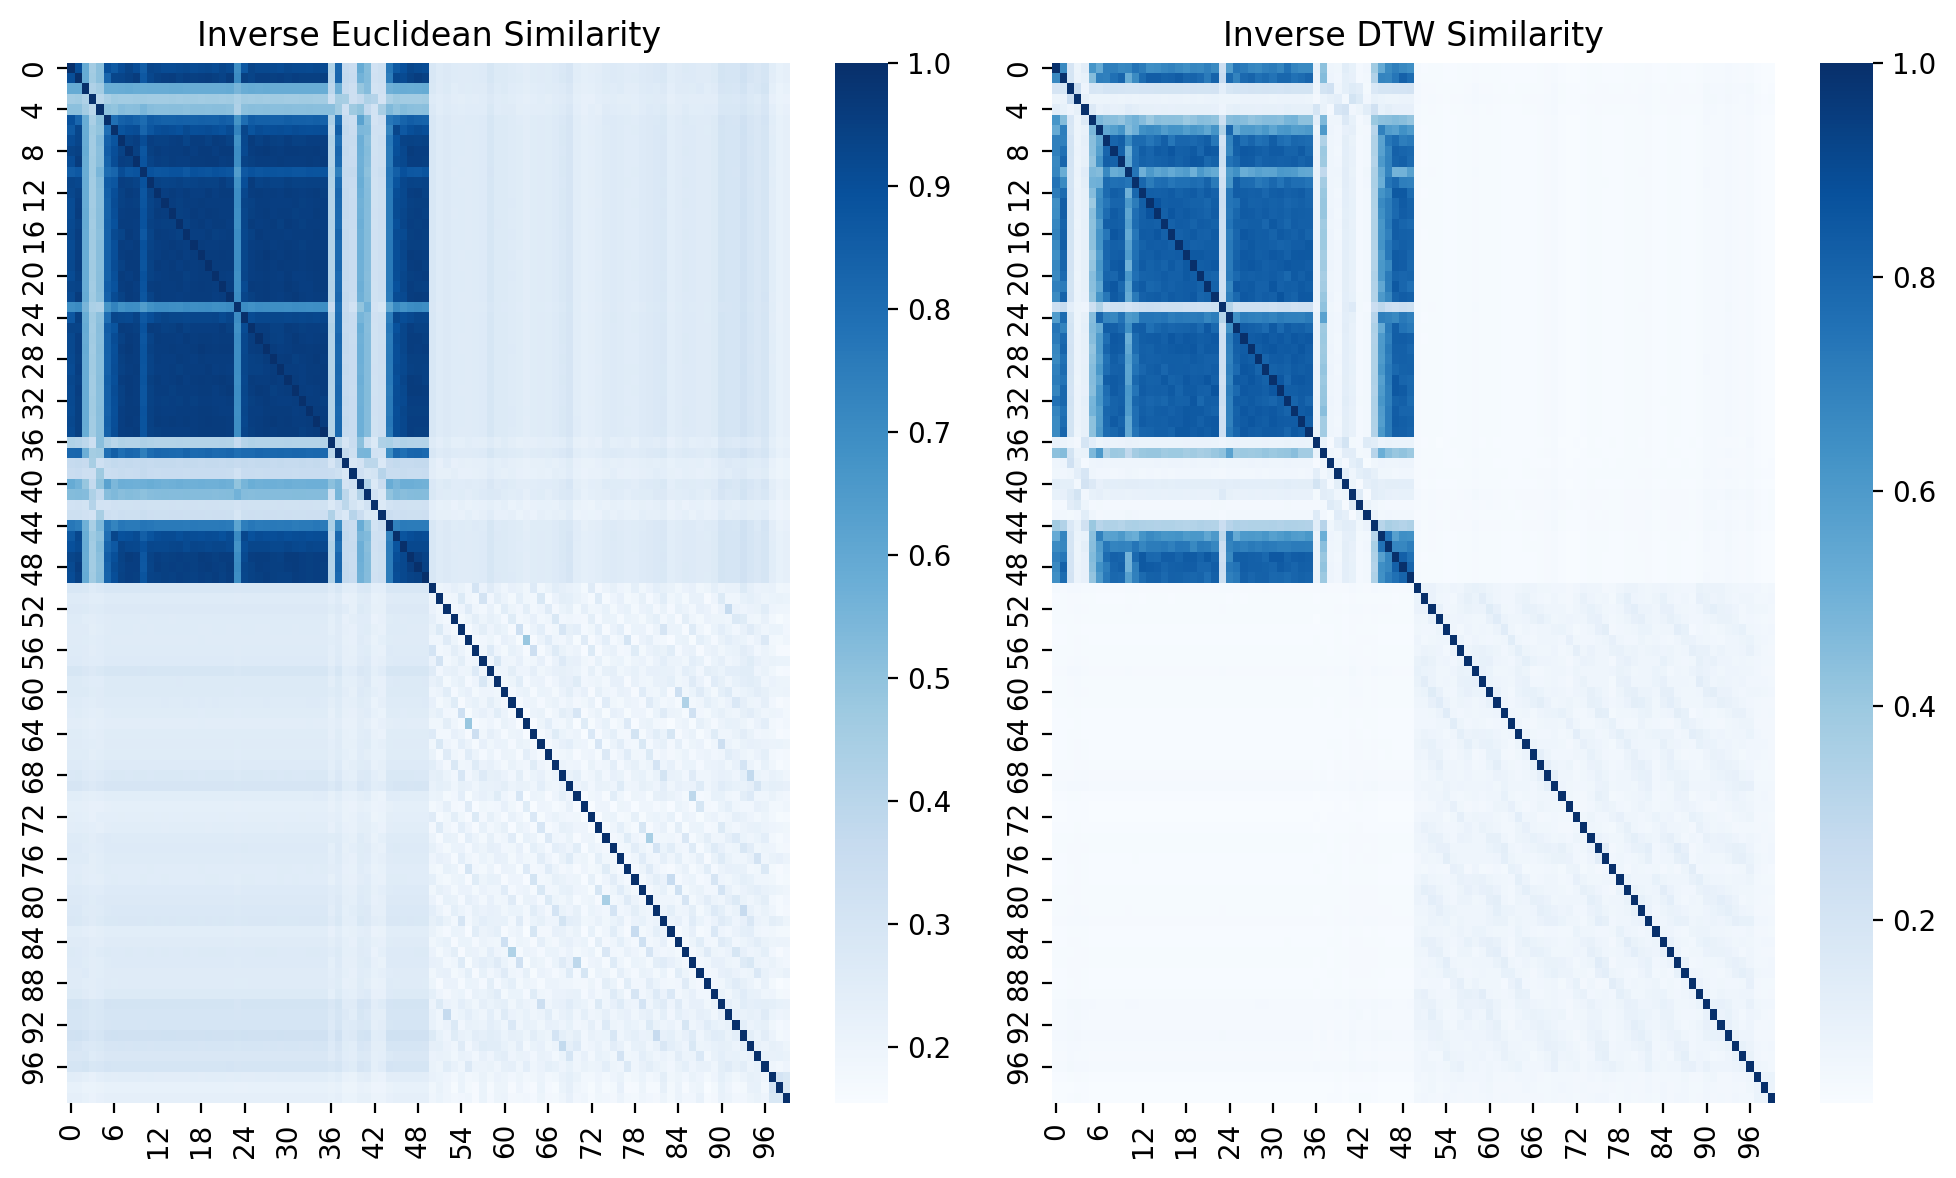

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

#for x direction 

sns.heatmap(inverse_euc_sim_matrix_x, cmap="Blues", ax=axes[0])
axes[0].set_title("Inverse Euclidean Similarity")

sns.heatmap(inverse_dtw_sim_matrix_x, cmap="Blues", ax=axes[1])
axes[1].set_title("Inverse DTW Similarity")

plt.tight_layout()
plt.show()

Computing DTW:   0%|          | 0/10000 [01:12<?, ?it/s]


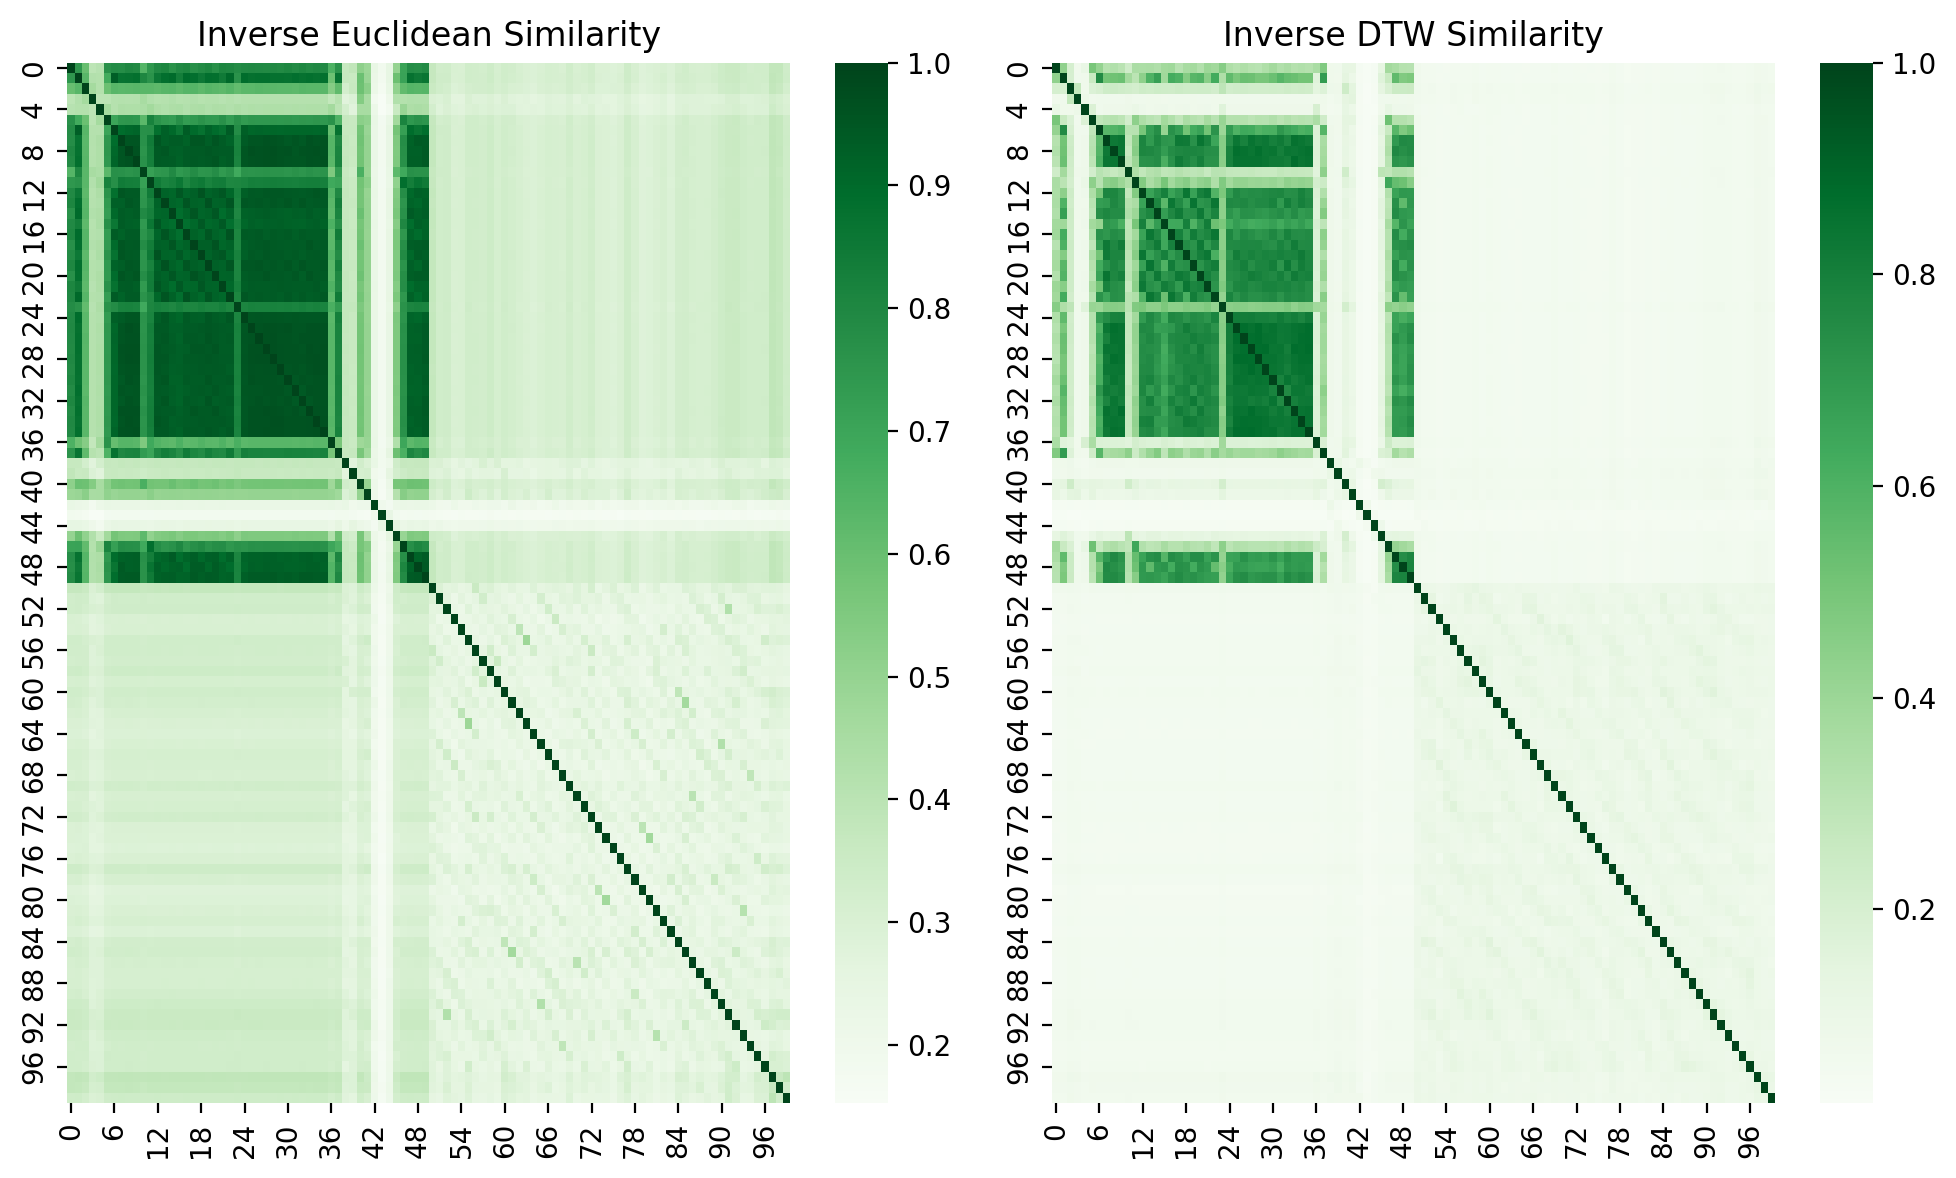

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

#for y direction 

sns.heatmap(inverse_euc_sim_matrix_y, cmap="Greens", ax=axes[0])
axes[0].set_title("Inverse Euclidean Similarity")

sns.heatmap(inverse_dtw_sim_matrix_y, cmap="Greens", ax=axes[1])
axes[1].set_title("Inverse DTW Similarity")

plt.tight_layout()
plt.show()

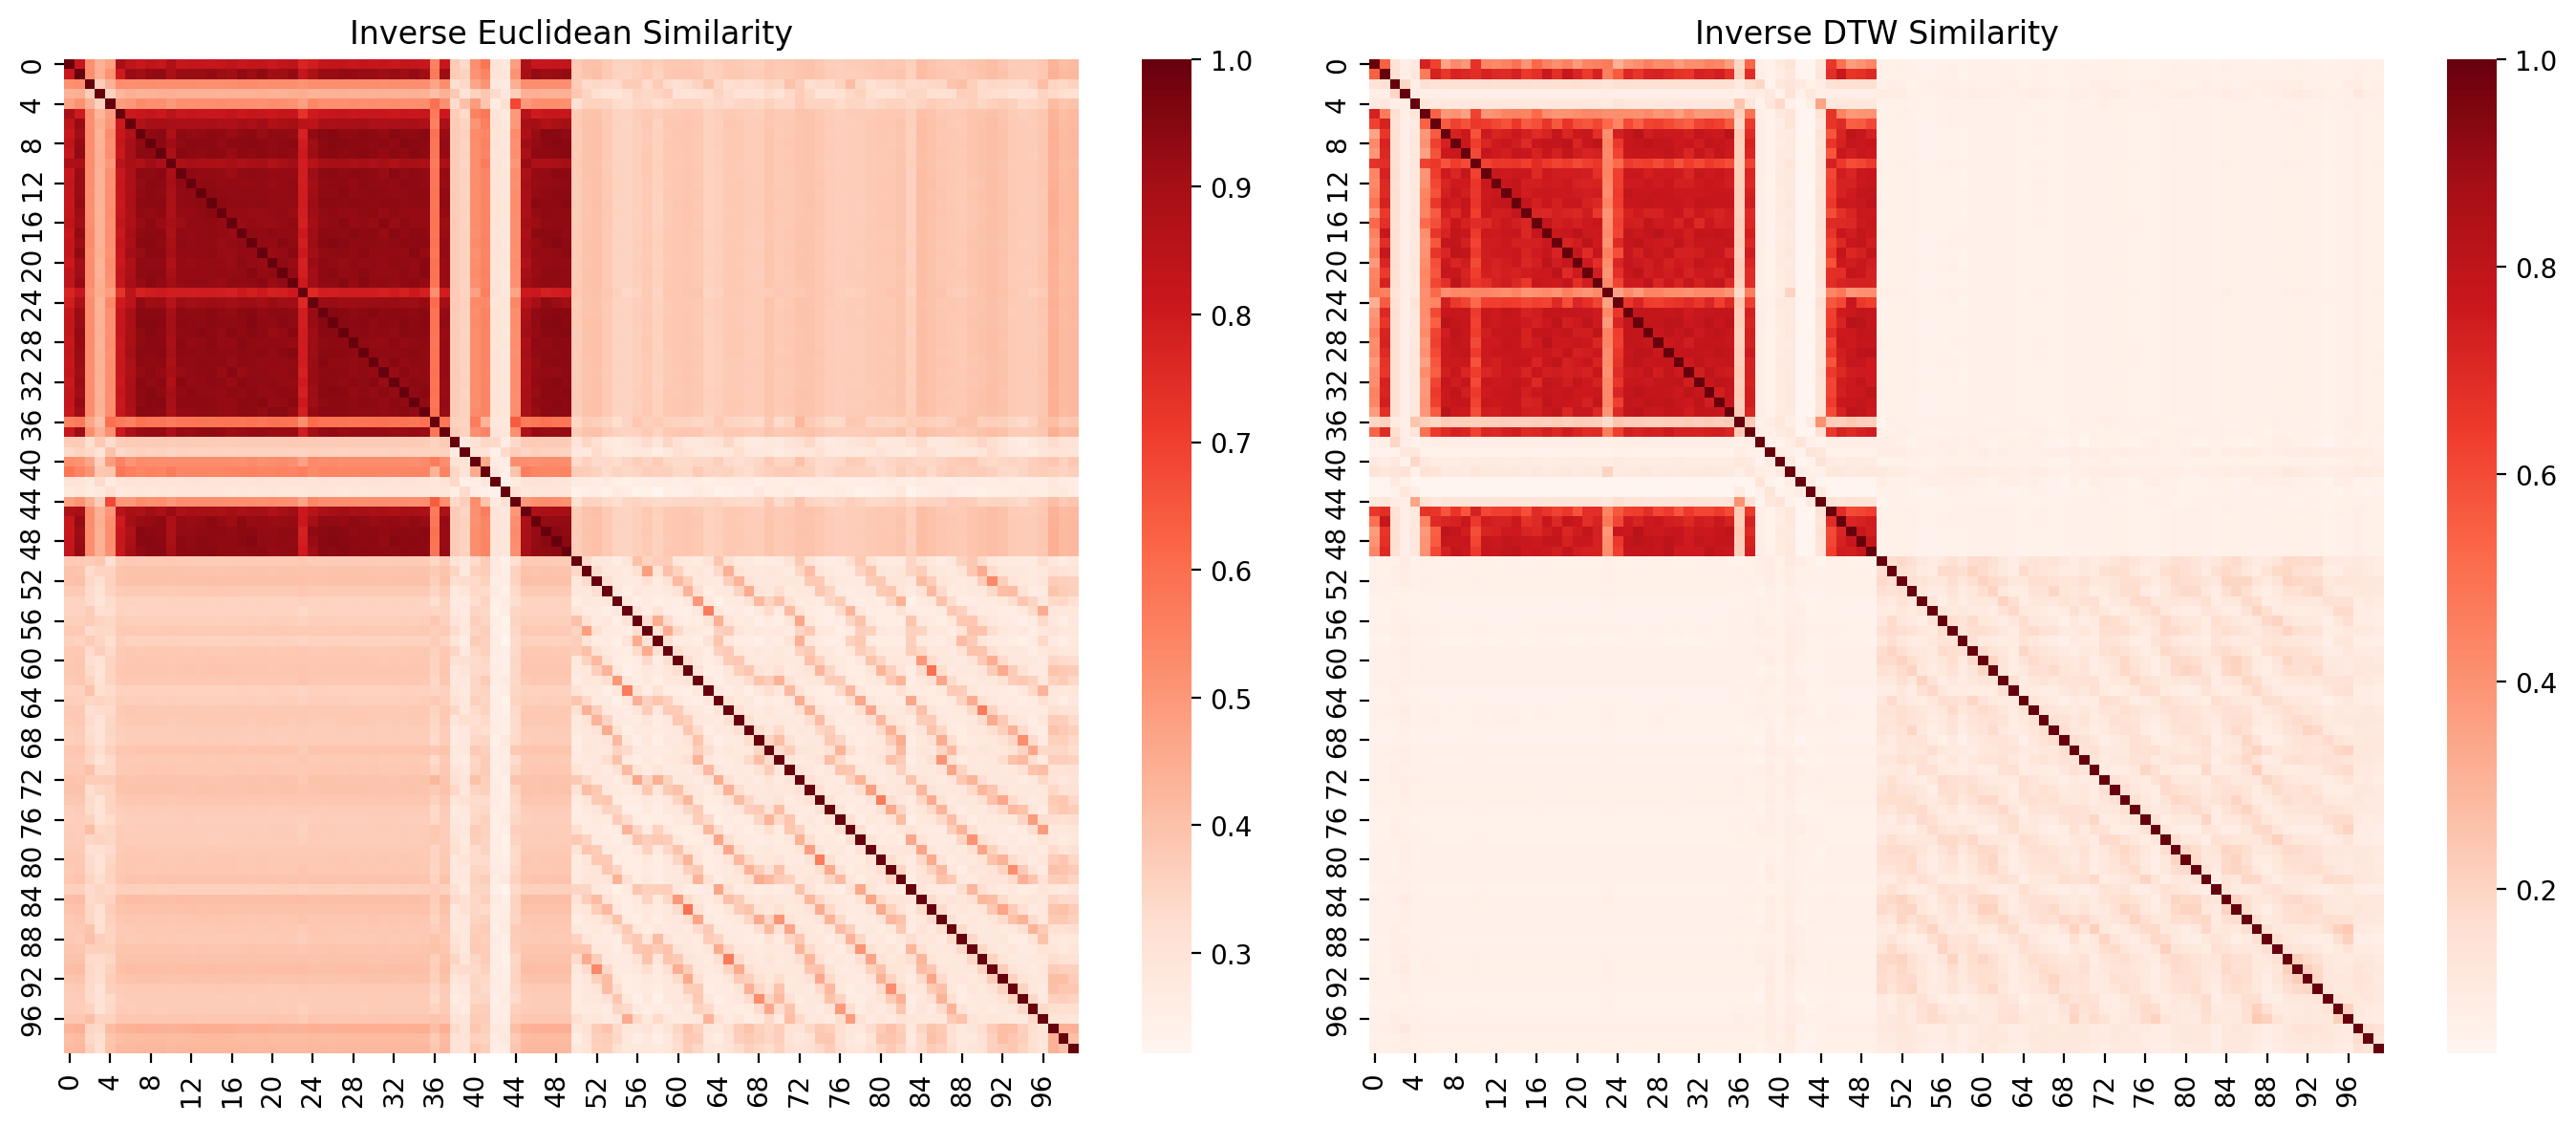

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#for z direction 

sns.heatmap(inverse_euc_sim_matrix_z, cmap="Reds", ax=axes[0])
axes[0].set_title("Inverse Euclidean Similarity")

sns.heatmap(inverse_dtw_sim_matrix_z, cmap="Reds", ax=axes[1])
axes[1].set_title("Inverse DTW Similarity")

plt.tight_layout()
plt.show()

Euclidean similarity is sharper, while DTW is blurrier.

If two sequences are slightly misaligned in time, Euclidean distance penalizes them heavily, leading to sharp boundaries in the similarity matrix.
Whereas, DTW (Dynamic Time Warping) allows for temporal distortions, meaning sequences can be stretched or compressed to align better.

Hence, DTW is better for Human Activity Recognition 

# Task 2: Apply Diffusion Maps for Dimensionality Reduction (1.5 mark)

![algorithm for diffusion map](diffusionmapalgo.png)

### Diffusion Kernel 


$$K(i, j) = \exp\left(-\frac{D(i, j)^2}{\epsilon}\right)$$


Balance Between Locality & Globality=>
If I used just $\sigma^2$ instead of $2\sigma^2$, the decay would be too sharp, making only very close points interact.
If I used $4\sigma^2$ instead, the kernel would decay too slowly, making even distant points seem similar.

In [63]:
dtw_distance_matrix_x>0 #boolean mask 

array([[False,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True, False]], shape=(100, 100))

In [ ]:
dtw_distance_matrix_x[dtw_distance_matrix_x>0] #we collected all non-zero values of the matrix

array([ 0.49532099,  4.18102283, 10.98911205, ..., 15.57120801,
        9.98276018, 10.2421977 ], shape=(9900,))

In [ ]:
'''
ϵ is a hyperparameter that determines the range of a datapoint's effective neighborhood.
hence, we have taken it as 2*sigma*sigma

Why? 
Now it mimics a gaussian with a few changes, intuitively. 

What is sigma? 
We have taken it as median DTW distance 


A good choice of ϵis very important. ϵshould be comparable to squared distances
from the data points to their neighbors. - From https://www.math.umd.edu/~mariakc/REU2023/Tutorials/DimensionalityReduction.pdf

'''
#x direction 

sigma_x = np.median(dtw_distance_matrix_x[dtw_distance_matrix_x > 0])  
diffusion_kernel_x = np.exp(-dtw_distance_matrix_x ** 2 / (2 * sigma_x ** 2))

#y direction 

sigma_y = np.median(dtw_distance_matrix_y[dtw_distance_matrix_y > 0])  
diffusion_kernel_y = np.exp(-dtw_distance_matrix_y ** 2 / (2 * sigma_y ** 2))

#y direction 

sigma_z = np.median(dtw_distance_matrix_z[dtw_distance_matrix_z > 0])  
diffusion_kernel_z = np.exp(-dtw_distance_matrix_z ** 2 / (2 * sigma_z ** 2))


In [64]:
diffusion_kernel_x

array([[1.        , 0.99964663, 0.97513165, ..., 0.33335391, 0.20539394,
        0.25909022],
       [0.99964663, 1.        , 0.97689198, ..., 0.32373028, 0.20299597,
        0.25550778],
       [0.97513165, 0.97689198, 1.        , ..., 0.42194605, 0.27297868,
        0.35836073],
       ...,
       [0.33335391, 0.32373028, 0.42194605, ..., 1.        , 0.85803923,
        0.86626691],
       [0.20539394, 0.20299597, 0.27297868, ..., 0.85803923, 1.        ,
        0.85974356],
       [0.25909022, 0.25550778, 0.35836073, ..., 0.86626691, 0.85974356,
        1.        ]], shape=(100, 100))

### Normalized Graph Laplacian 

the degree matrix D, where  $D_{ii} = \sum_j K(i,j)$  and

Compute the normalized Laplacian:

$$
L = D^{-1/2} K D^{-1/2}
$$

here  I  is the identity matrix.

**Note**: We are using this representation of the normalized graph laplacian because this is a better choice for time series clustering, our objective. 

In [82]:
#for x 

degree_matrix_x = np.diag(np.sum(diffusion_kernel_x, axis=1))
D_inv_sqrt_x = np.diag(1 / np.sqrt(degree_matrix_x.diagonal()))
L_x = D_inv_sqrt_x @ diffusion_kernel_x @ D_inv_sqrt_x  #@ takes dot product as we know, np.eye is identiy 

#for y

degree_matrix_y = np.diag(np.sum(diffusion_kernel_y, axis=1))
D_inv_sqrt_y = np.diag(1 / np.sqrt(degree_matrix_y.diagonal()))
L_y = D_inv_sqrt_y @ diffusion_kernel_y @ D_inv_sqrt_y  #@ takes dot product as we know, np.eye is identiy 

#for z 

degree_matrix_z = np.diag(np.sum(diffusion_kernel_z, axis=1))
D_inv_sqrt_z = np.diag(1 / np.sqrt(degree_matrix_z.diagonal()))
L_z = D_inv_sqrt_z @ diffusion_kernel_z @ D_inv_sqrt_z  #@ takes dot product as we know, np.eye is identiy 


In [72]:
L_z.shape, D_inv_sqrt_z.shape

((100, 100), (100, 100))

In [67]:
(D_inv_sqrt_z @ diffusion_kernel_z @ D_inv_sqrt_z).shape

(100, 100)

### Eigen vectors for Diffusion Projection 

In [83]:
from numpy import linalg as lg

In [90]:
eigvals_x, eigvecs_x = lg.eigh(L_x)

#ascending to descending 
idx = np.argsort(eigvals_x)[::-1]  
eigvals_x = eigvals_x[idx]         
eigvecs_x = eigvecs_x[:, idx]      

eigvals_y, eigvecs_y = lg.eigh(L_y)

#ascending to descending 
idx = np.argsort(eigvals_y)[::-1]  
eigvals_y = eigvals_y[idx]         
eigvecs_y = eigvecs_y[:, idx] 

eigvals_z, eigvecs_z = lg.eigh(L_z)

#ascending to descending 
idx = np.argsort(eigvals_y)[::-1]  
eigvals_z = eigvals_z[idx]         
eigvecs_z = eigvecs_z[:, idx] 

In [91]:
eigvecs_x

array([[-1.03197597e-01, -1.03153600e-01,  1.17730821e-04, ...,
         1.19506695e-02, -1.23395919e-02,  5.19836027e-02],
       [-1.03051867e-01, -1.03245122e-01,  3.20760545e-03, ...,
         1.60355007e-03,  1.48587794e-02,  1.37564264e-02],
       [-1.05208794e-01, -8.49826096e-02, -5.05109989e-04, ...,
        -1.08459134e-01,  1.87397876e-01, -2.80283925e-01],
       ...,
       [-9.17807350e-02,  1.03929480e-01, -3.57499734e-02, ...,
         4.36889331e-02, -3.23417086e-02, -1.91481189e-02],
       [-8.54622506e-02,  1.33890349e-01, -5.29117887e-02, ...,
        -3.31116396e-02, -1.71865353e-02, -4.24594978e-04],
       [-8.77610927e-02,  1.18386100e-01, -7.63183280e-02, ...,
        -4.80716007e-02,  3.34219239e-02,  6.17285074e-02]],
      shape=(100, 100))

In [92]:
eigvals_x

array([ 1.00000000e+00,  3.75658113e-01,  3.23645573e-02,  2.89717051e-02,
        2.87639570e-02,  2.33541996e-02,  1.94823018e-02,  1.56760696e-02,
        9.34063838e-03,  6.76079294e-03,  6.43510671e-03,  5.30142977e-03,
        4.84046108e-03,  4.32479032e-03,  3.91646701e-03,  3.87602277e-03,
        3.80627379e-03,  3.09697664e-03,  3.02743294e-03,  2.90242158e-03,
        2.80202639e-03,  2.58627186e-03,  2.48495458e-03,  2.26175383e-03,
        1.91725691e-03,  1.89175517e-03,  1.69915296e-03,  1.58513798e-03,
        1.39729782e-03,  1.38117690e-03,  1.34222054e-03,  1.28230587e-03,
        1.03547121e-03,  9.19235708e-04,  8.56429195e-04,  8.29346743e-04,
        6.47001113e-04,  5.77448970e-04,  4.67193259e-04,  4.16419117e-04,
        3.62112616e-04,  3.00511755e-04,  2.61010474e-04,  1.78235464e-04,
        1.34187552e-04,  1.01731351e-04,  5.44840954e-05,  4.35044407e-05,
        3.00693501e-05,  1.59377699e-05,  1.17291608e-05,  6.74920557e-06,
        5.95930642e-06,  

Here, we can observe, that the largest eigen value is 1, this is called the trivial one. This provides no value. Hence, we need some vectors before 1 for our embedding space. 

We will take eigen vectors/columns 1, 2 and 3 [assume that column starts from 0]

### Normalization step - random walk eqn
$$
L_{\text{rw}} = D^{-1} A
$$

In [105]:
Lrw_x=np.diag(1 / degree_matrix_y.diagonal()) @ eigvecs_x
Lrw_y=np.diag(1 / degree_matrix_y.diagonal()) @ eigvecs_x
Lrw_z=np.diag(1 / degree_matrix_y.diagonal()) @ eigvecs_x

In [ ]:
k = 3 #this is the embedding dimension 
diffusion_coords_x = Lrw_x[:, 1:k+1] @ np.diag(eigvals_x[1:k+1].transpose()) 
diffusion_coords_y = Lrw_x[:, 1:k+1] @ np.diag(eigvals_y[1:k+1].transpose())  
diffusion_coords_z = Lrw_x[:, 1:k+1] @ np.diag(eigvals_z[1:k+1].transpose())

# Task 3 - Clustering

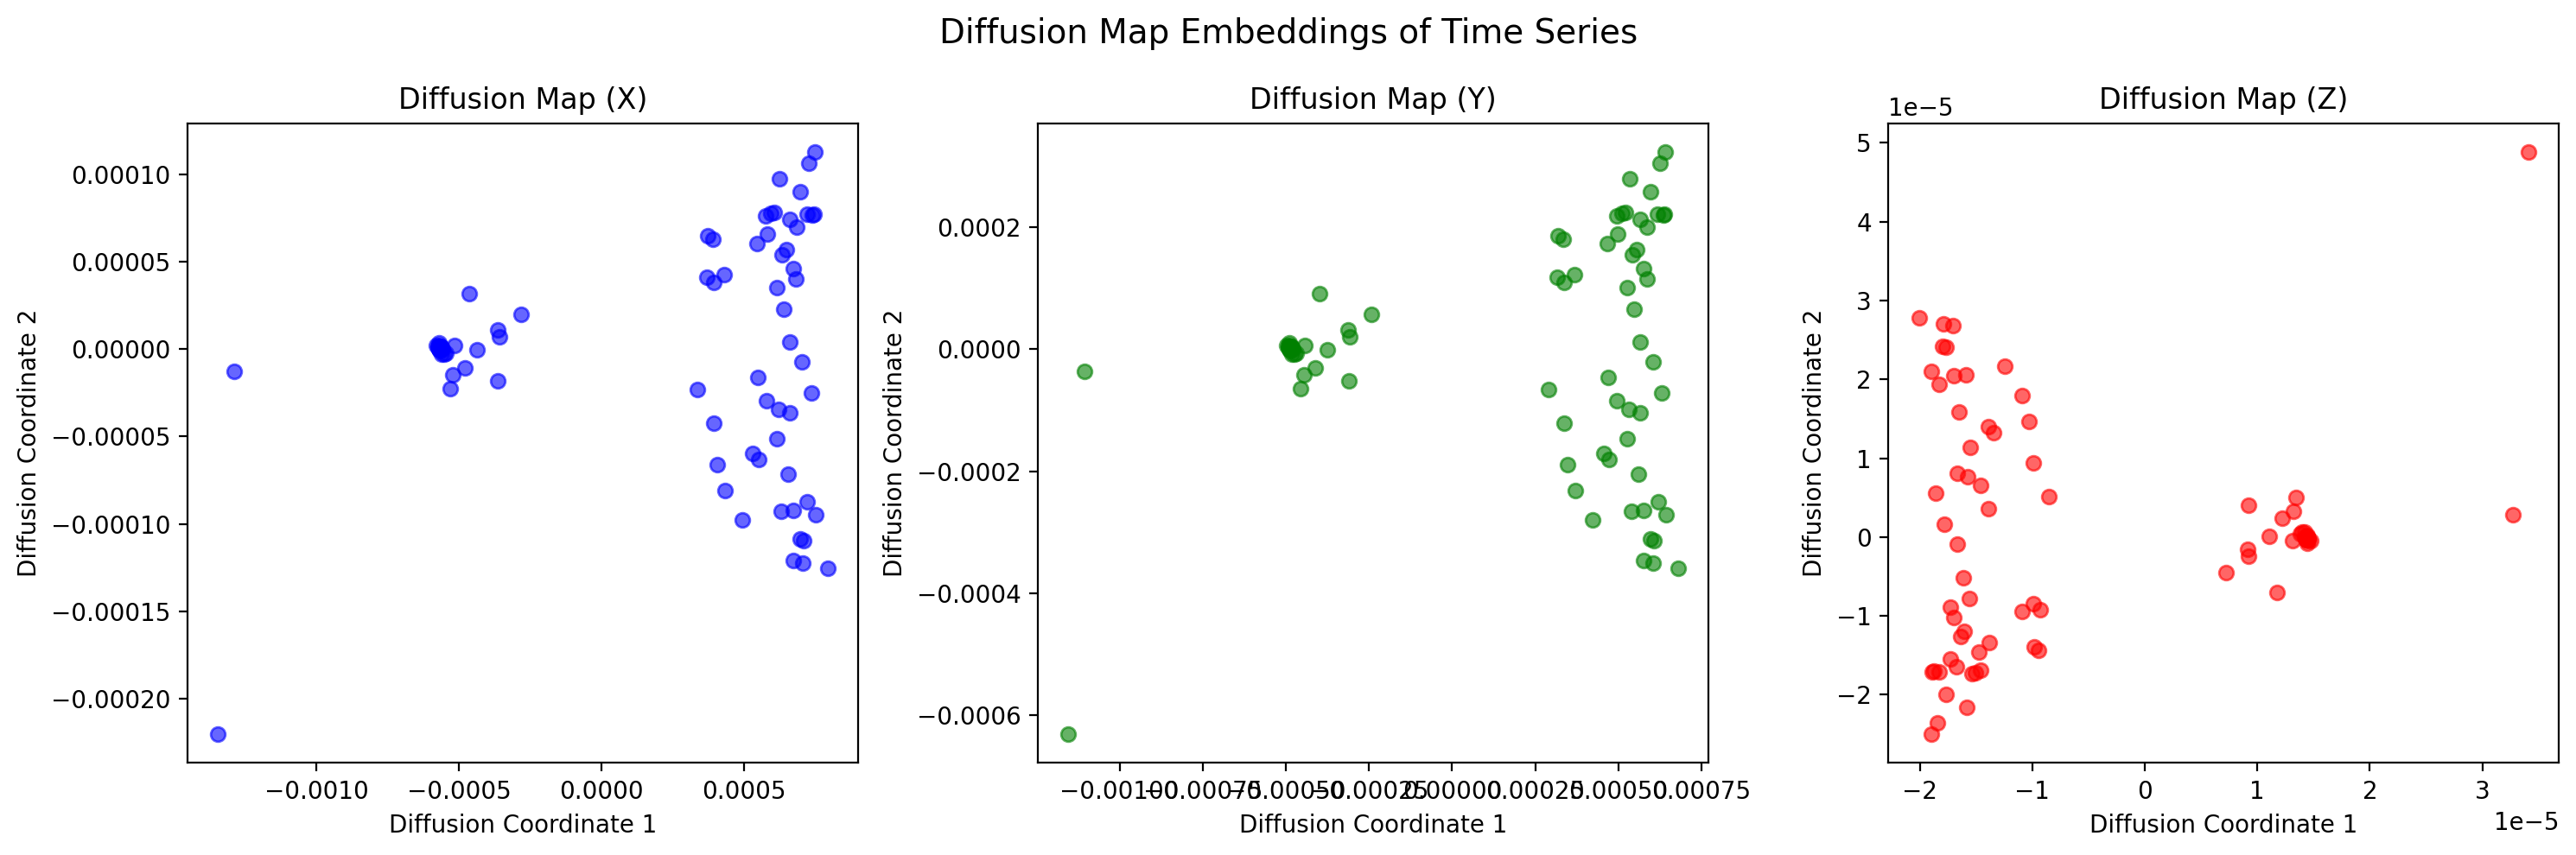

In [118]:
##Color Coded Based on Axis, Not on true labels 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#X 
axes[0].scatter(diffusion_coords_x[:, 0], diffusion_coords_x[:, 1], c='blue', alpha=0.6)
axes[0].set_xlabel("Diffusion Coordinate 1")
axes[0].set_ylabel("Diffusion Coordinate 2")
axes[0].set_title("Diffusion Map (X)")

#Y 
axes[1].scatter(diffusion_coords_y[:, 0], diffusion_coords_y[:, 1], c='green', alpha=0.6)
axes[1].set_xlabel("Diffusion Coordinate 1")
axes[1].set_ylabel("Diffusion Coordinate 2")
axes[1].set_title("Diffusion Map (Y)")

#Z 
axes[2].scatter(diffusion_coords_z[:, 0], diffusion_coords_z[:, 1], c='red', alpha=0.6)
axes[2].set_xlabel("Diffusion Coordinate 1")
axes[2].set_ylabel("Diffusion Coordinate 2")
axes[2].set_title("Diffusion Map (Z)")

plt.suptitle("Diffusion Map Embeddings of Time Series", fontsize=14)
plt.tight_layout()
plt.show()

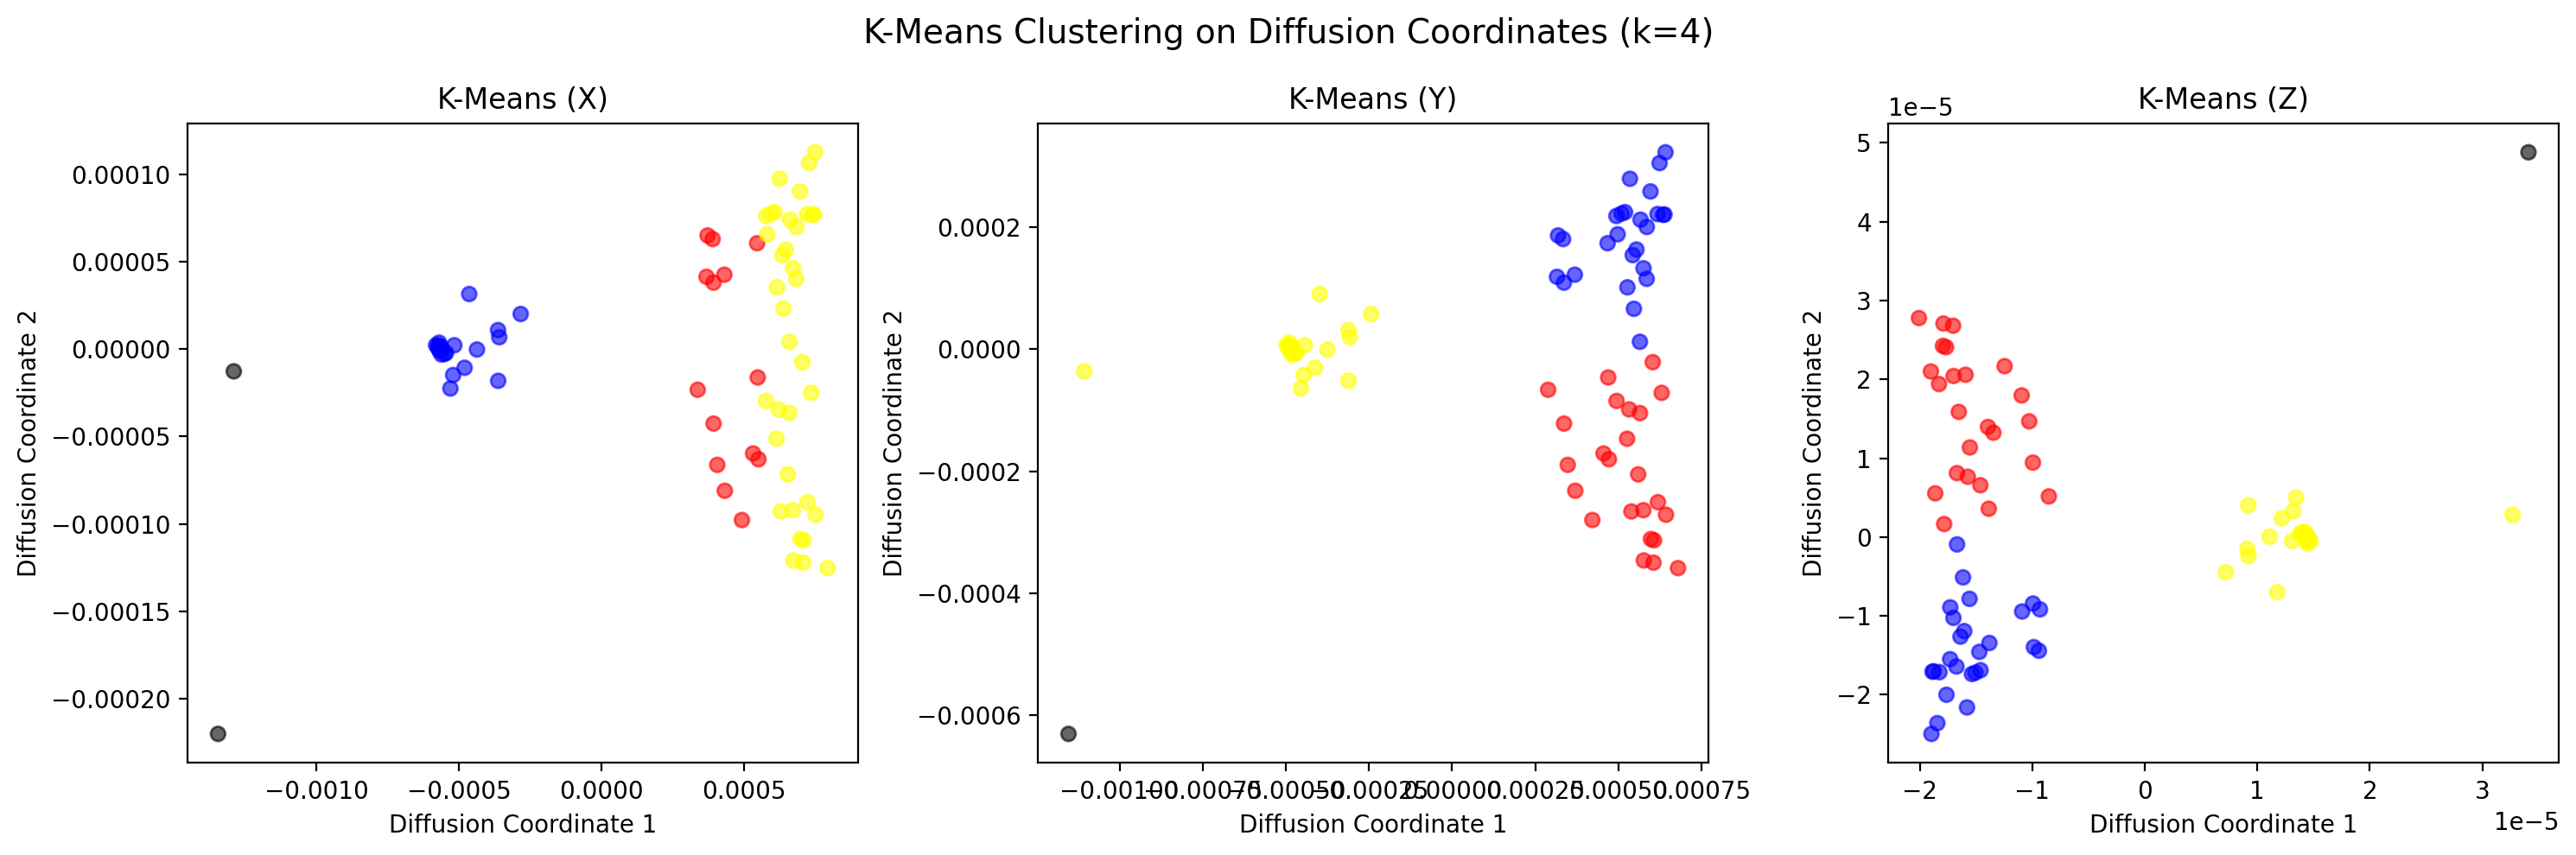

In [119]:
k_given = 4 

#cluster colours for k = 4 
cluster_colors = ["black", "yellow", "blue", "red"]

#k means using all 3 features 
kmeans_x = KMeans(n_clusters=k_given, random_state=2).fit(diffusion_coords_x)
kmeans_y = KMeans(n_clusters=k_given, random_state=2).fit(diffusion_coords_y)
kmeans_z = KMeans(n_clusters=k_given, random_state=2).fit(diffusion_coords_z)

labels_x = kmeans_x.labels_
labels_y = kmeans_y.labels_
labels_z = kmeans_z.labels_

#only first two coordinates for visualization/scatter plot 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#X 
axes[0].scatter(diffusion_coords_x[:, 0], diffusion_coords_x[:, 1], 
                c=[cluster_colors[label] for label in labels_x], alpha=0.6)
axes[0].set_xlabel("Diffusion Coordinate 1")
axes[0].set_ylabel("Diffusion Coordinate 2")
axes[0].set_title("K-Means (X)")

#Y
axes[1].scatter(diffusion_coords_y[:, 0], diffusion_coords_y[:, 1], 
                c=[cluster_colors[label] for label in labels_y], alpha=0.6)
axes[1].set_xlabel("Diffusion Coordinate 1")
axes[1].set_ylabel("Diffusion Coordinate 2")
axes[1].set_title("K-Means (Y)")

#Z 
axes[2].scatter(diffusion_coords_z[:, 0], diffusion_coords_z[:, 1], 
                c=[cluster_colors[label] for label in labels_z], alpha=0.6)
axes[2].set_xlabel("Diffusion Coordinate 1")
axes[2].set_ylabel("Diffusion Coordinate 2")
axes[2].set_title("K-Means (Z)")

plt.suptitle(f"K-Means Clustering on Diffusion Coordinates (k={k_given})", fontsize=14)
plt.tight_layout()
plt.show()

In [120]:
labels_x, labels_y, labels_z

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        0, 2, 2, 2, 2, 2, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 

In [121]:
ari_x = adjusted_rand_score(y_train_need, labels_x)
ari_y = adjusted_rand_score(y_train_need, labels_y)
ari_z = adjusted_rand_score(y_train_need, labels_z)

silhouette_x = silhouette_score(diffusion_coords_x[:, :2], labels_x)
silhouette_y = silhouette_score(diffusion_coords_y[:, :2], labels_y)
silhouette_z = silhouette_score(diffusion_coords_z[:, :2], labels_z)

print(f"ARI Scores: X={ari_x:.4f}, Y={ari_y:.4f}, Z={ari_z:.4f}")
print(f"Silhouette Scores: X={silhouette_x:.4f}, Y={silhouette_y:.4f}, Z={silhouette_z:.4f}")

ARI Scores: X=0.4948, Y=0.4527, Z=0.4527
Silhouette Scores: X=0.7035, Y=0.7232, Z=0.7786


**Adjusted Rand Index (ARI)**

=> Range: [-1, 1] (higher is better, 1 means perfect clustering)

The Y clustering has the best alignment with the ground truth labels (y_train_need).
<br>

**Silhouette Score**

=> Range: [-1, 1] (higher is better, 1 means well-separated clusters)

# Task 4 - Visualization and Interpreation 

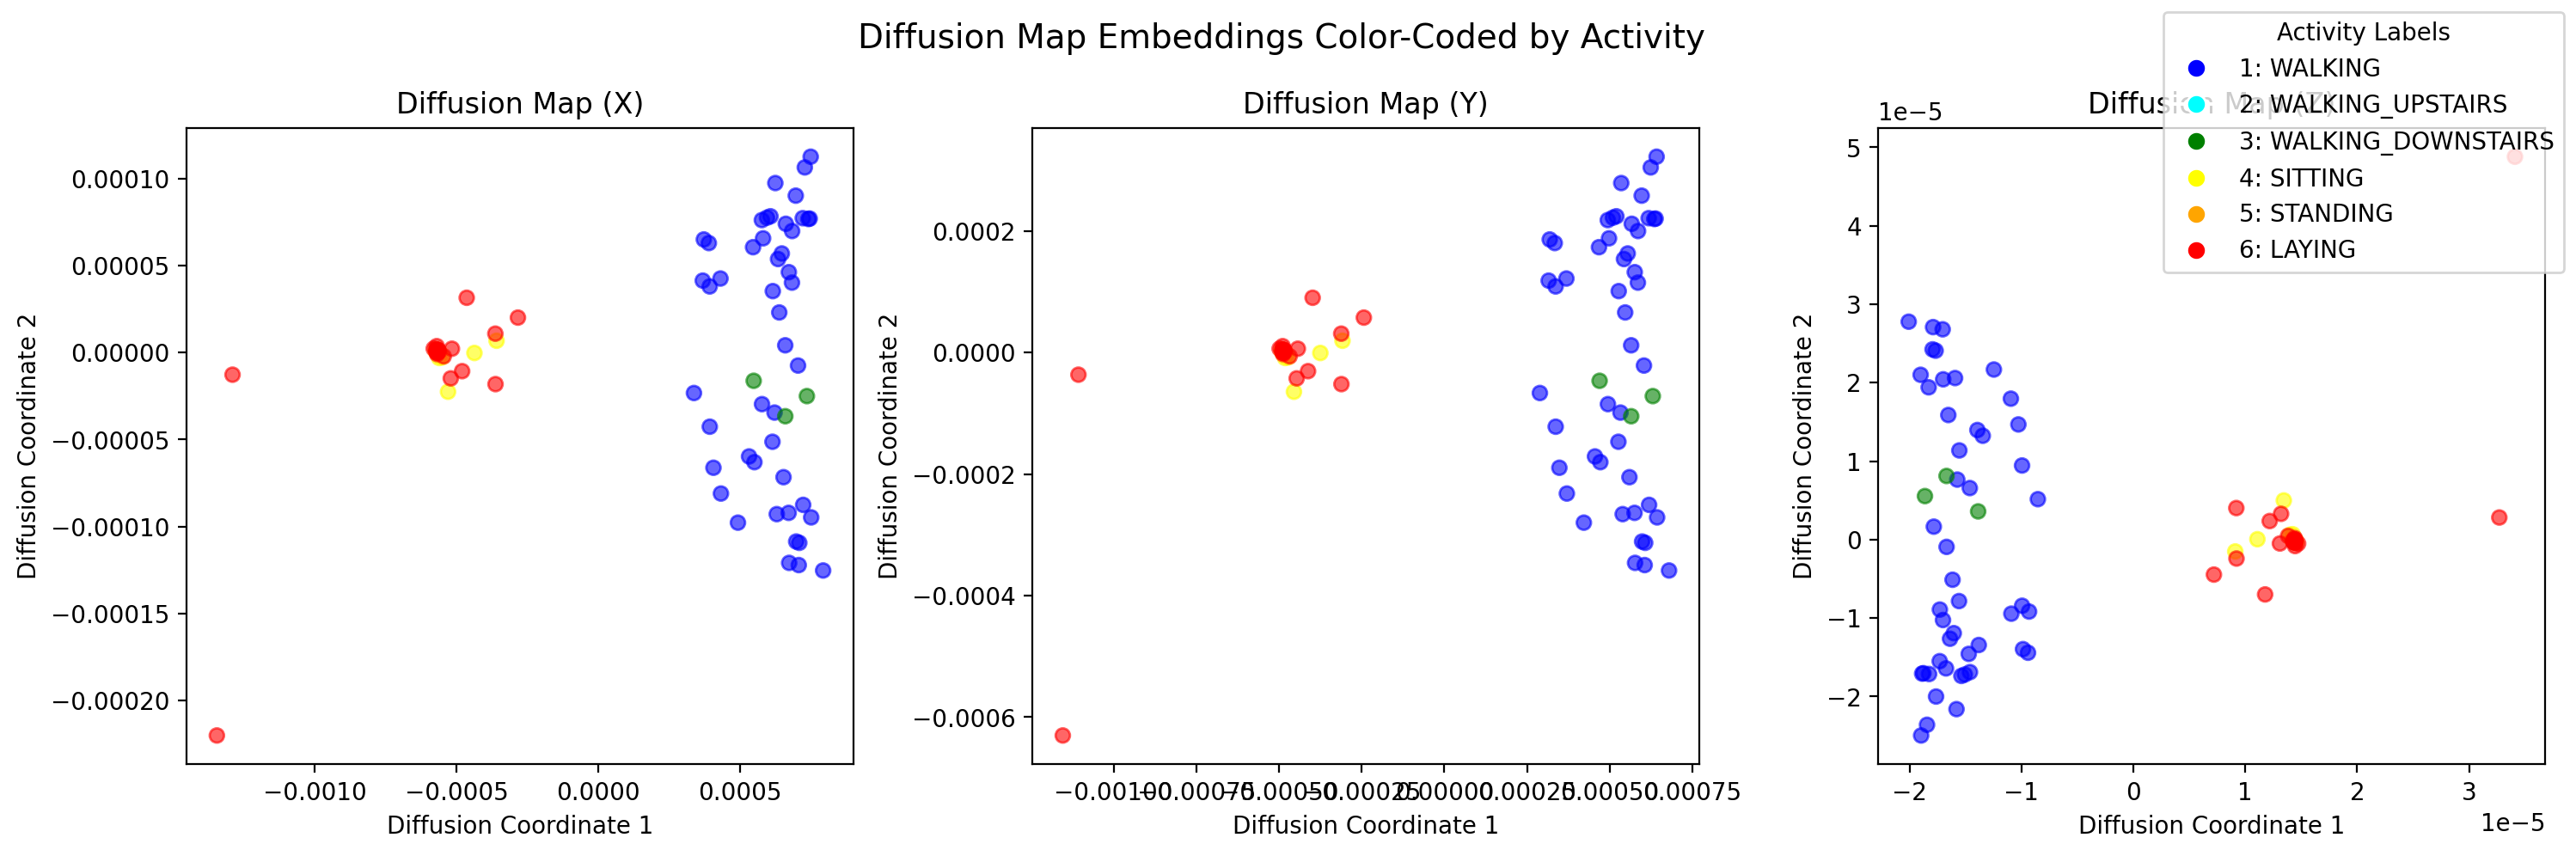

In [122]:
#colormap
color_map = {1: "blue", 2: "cyan", 3: "green", 4: "yellow", 5: "orange", 6: "red"}  
point_colors = [color_map[label] for label in y_train_need]  

activity_labels = {  
    1: "WALKING",  
    2: "WALKING_UPSTAIRS",  
    3: "WALKING_DOWNSTAIRS",  
    4: "SITTING",  
    5: "STANDING",  
    6: "LAYING"  
}  

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#X  
axes[0].scatter(diffusion_coords_x[:, 0], diffusion_coords_x[:, 1], c=point_colors, alpha=0.6)  
axes[0].set_xlabel("Diffusion Coordinate 1")  
axes[0].set_ylabel("Diffusion Coordinate 2")  
axes[0].set_title("Diffusion Map (X)")  

#Y  
axes[1].scatter(diffusion_coords_y[:, 0], diffusion_coords_y[:, 1], c=point_colors, alpha=0.6)  
axes[1].set_xlabel("Diffusion Coordinate 1")  
axes[1].set_ylabel("Diffusion Coordinate 2")  
axes[1].set_title("Diffusion Map (Y)")  

#Z  
axes[2].scatter(diffusion_coords_z[:, 0], diffusion_coords_z[:, 1], c=point_colors, alpha=0.6)  
axes[2].set_xlabel("Diffusion Coordinate 1")  
axes[2].set_ylabel("Diffusion Coordinate 2")  
axes[2].set_title("Diffusion Map (Z)")  

#legend 
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color)  
           for color in color_map.values()]  
labels = [f"{key}: {activity_labels[key]}" for key in color_map.keys()]  
fig.legend(handles, labels, loc="upper right", title="Activity Labels")  

plt.suptitle("Diffusion Map Embeddings Color-Coded by Activity", fontsize=14)  
plt.tight_layout()  
plt.show()  

In [123]:
body_acc_x_windowed_np.shape

(100, 128)

In [124]:
#---- 1. Raw Feature Space ----
##############################
kmeans_raw_x = KMeans(n_clusters=k_given, random_state=2).fit(body_acc_x_windowed_np)
labels_raw_x = kmeans_raw_x.labels_

ari_raw_x = adjusted_rand_score(y_train_need, labels_raw_x)
silhouette_raw_x = silhouette_score(body_acc_x_windowed_np, labels_raw_x)
##############################
kmeans_raw_y = KMeans(n_clusters=k_given, random_state=2).fit(body_acc_y_windowed_np)
labels_raw_y = kmeans_raw_y.labels_

ari_raw_y = adjusted_rand_score(y_train_need, labels_raw_y)
silhouette_raw_y = silhouette_score(body_acc_y_windowed_np, labels_raw_y)
##############################
kmeans_raw_z = KMeans(n_clusters=k_given, random_state=2).fit(body_acc_z_windowed_np)
labels_raw_z = kmeans_raw_z.labels_

ari_raw_z = adjusted_rand_score(y_train_need, labels_raw_z)
silhouette_raw_z = silhouette_score(body_acc_z_windowed_np, labels_raw_z)


In [125]:
# ---- 2. PCA ----
##############################
pca_x = PCA(n_components=3)
X_pca_x = pca_x.fit_transform(body_acc_x_windowed_np)

kmeans_pca_x = KMeans(n_clusters=k_given, random_state=2).fit(X_pca_x)
labels_pca_x = kmeans_pca_x.labels_

ari_pca_x = adjusted_rand_score(y_train_need, labels_pca_x)
silhouette_pca_x = silhouette_score(X_pca_x, labels_pca_x)
##############################
pca_y = PCA(n_components=3)
X_pca_y = pca_y.fit_transform(body_acc_y_windowed_np)

kmeans_pca_y = KMeans(n_clusters=k_given, random_state=2).fit(X_pca_y)
labels_pca_y = kmeans_pca_y.labels_

ari_pca_y = adjusted_rand_score(y_train_need, labels_pca_y)
silhouette_pca_y = silhouette_score(X_pca_y, labels_pca_y)
##############################
pca_z = PCA(n_components=3)
X_pca_z = pca_z.fit_transform(body_acc_z_windowed_np)

kmeans_pca_z = KMeans(n_clusters=k_given, random_state=2).fit(X_pca_z)
labels_pca_z = kmeans_pca_z.labels_

ari_pca_z = adjusted_rand_score(y_train_need, labels_pca_z)
silhouette_pca_z = silhouette_score(X_pca_z, labels_pca_z)
##############################

In [126]:
# ---- 3. t-SNE ----
##############################
tsne_x = TSNE(n_components=3, random_state=2)
X_tsne_x = tsne_x.fit_transform(body_acc_y_windowed_np)

kmeans_tsne_x = KMeans(n_clusters=k_given, random_state=2).fit(X_tsne_x)
labels_tsne_x = kmeans_tsne_x.labels_

ari_tsne_x = adjusted_rand_score(y_train_need, labels_tsne_x)
silhouette_tsne_x = silhouette_score(X_tsne_x, labels_tsne_x)
##############################
tsne_y = TSNE(n_components=3, random_state=2)
X_tsne_y = tsne_y.fit_transform(body_acc_y_windowed_np)

kmeans_tsne_y = KMeans(n_clusters=k_given, random_state=2).fit(X_tsne_y)
labels_tsne_y = kmeans_tsne_y.labels_

ari_tsne_y = adjusted_rand_score(y_train_need, labels_tsne_y)
silhouette_tsne_y = silhouette_score(X_tsne_y, labels_tsne_y)
##############################
tsne_z = TSNE(n_components=3, random_state=2)
X_tsne_z = tsne_z.fit_transform(body_acc_z_windowed_np)

kmeans_tsne_z = KMeans(n_clusters=k_given, random_state=2).fit(X_tsne_z)
labels_tsne_z = kmeans_tsne_z.labels_

ari_tsne_z = adjusted_rand_score(y_train_need, labels_tsne_z)
silhouette_tsne_z = silhouette_score(X_tsne_z, labels_tsne_z)
##############################

In [127]:
df_ari = pd.DataFrame({
    "Method": ["Raw Features", "PCA", "t-SNE", "Diffusion Map"],
    "X": [ari_raw_x, ari_pca_x, ari_tsne_x, ari_x],
    "Y": [ari_raw_y, ari_pca_y, ari_tsne_y, ari_y],
    "Z": [ari_raw_z, ari_pca_z, ari_tsne_z, ari_z]
})
df_ari

,Method,X,Y,Z
0,Raw Features,0.009892,-0.035978,0.054406
1,PCA,0.096773,0.069976,0.093558
2,t-SNE,0.015082,0.015082,0.016618
3,Diffusion Map,0.494786,0.452742,0.452742


In [128]:
df_silhouette = pd.DataFrame({
    "Method": ["Raw Features", "PCA", "t-SNE", "Diffusion Map"],
    "X": [silhouette_raw_x, silhouette_pca_x, silhouette_tsne_x, silhouette_x],
    "Y": [silhouette_raw_y, silhouette_pca_y, silhouette_tsne_y, silhouette_y],
    "Z": [silhouette_raw_z, silhouette_pca_z, silhouette_tsne_z, silhouette_z]
})
df_silhouette

,Method,X,Y,Z
0,Raw Features,0.139534,0.238763,0.287741
1,PCA,0.488685,0.434136,0.508392
2,t-SNE,0.229370,0.229370,0.228949
3,Diffusion Map,0.703534,0.723222,0.778572
